In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
from IPython.display import HTML, display
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
import scikitplot as skplt

In [3]:
# Si no quieres usar estas funciones puedes borrarlas.
# Si quieres definir otras funciones, este es el espacio.
# También puedes definirlas en un módulo separado.
def relaciones_vs_target(X, Y, return_type="axes"):
    fig_tot = len(X.columns)
    fig_por_fila = 4
    tamanio_fig = 4
    num_filas = int(np.ceil(fig_tot / fig_por_fila))
    plt.figure(figsize=(fig_por_fila * tamanio_fig + 5, num_filas * tamanio_fig + 5))
    c = 0
    for i, col in enumerate(X.columns):
        plt.subplot(num_filas, fig_por_fila, i + 1)
        sns.scatterplot(x=X[col], y=Y)
        plt.title("%s vs %s" % (col, "target"))
        plt.ylabel("Target")
        plt.xlabel(col)
    plt.show()


def represento_doble_hist(
    x_1, x_0, n_bins=11, title="", label_1="Clase 1", label_0="Clase 0", normed=0
):
    bins = n_bins
    plt.hist(x_1, bins, alpha=0.5, label=label_1, color="red")
    plt.hist(x_0, bins, alpha=0.5, label=label_0, color="green")
    plt.title(title)
    plt.legend(loc="best")


def hist_pos_neg_feat(x, y, normed=0, nbins=11, targets=(0, 1)):
    fig_tot = len(x.columns)
    fig_tot_fila = 4
    fig_tamanio = 4
    num_filas = int(np.ceil(fig_tot / fig_tot_fila))
    plt.figure(figsize=(fig_tot_fila * fig_tamanio + 2, num_filas * fig_tamanio + 2))
    target_neg, target_pos = targets
    for i, feat in enumerate(x.columns):
        plt.subplot(num_filas, fig_tot_fila, i + 1)
        plt.title("%s" % feat)
        idx_pos = y == target_pos
        idx_neg = y == target_neg
        represento_doble_hist(
            x[feat][idx_pos].values,
            x[feat][idx_neg].values,
            nbins,
            normed=normed,
            title=("%s" % feat),
        )

In [4]:
# import warnings
# warnings.filterwarnings("ignore")
# import warnings filter
from warnings import simplefilter

simplefilter(action="ignore", category=FutureWarning)

In [5]:
from pydatautils.utils.notebook_utils import Utils

Utils.fix_to_pandas()

In [6]:
df_raw = pd.read_csv("Absenteeism_at_work.csv")
print(df_raw.shape)
df_raw.pprint()

(740, 21)


,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,2


In [7]:
df_raw.drop(["ID"], axis=1, inplace=True)

In [8]:
df_raw["target"] = np.where(df_raw["Absenteeism time in hours"] > 4, 1, 0)
df_raw.drop(["Absenteeism time in hours"], axis=1, inplace=True)
df_raw.pprint()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,target
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31,0
2,23,7,4,1,179,51,18,38,239.554,97,0,1,0,1,0,0,89,170,31,0
3,7,7,5,1,279,5,14,39,239.554,97,0,1,2,1,1,0,68,168,24,0
4,23,7,5,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30,0


In [9]:
df_raw[["target"]].value_counts()

target
0         461
1         279
dtype: int64

In [10]:
df_raw[["target"]].value_counts() / df_raw.shape[0]

target
0                       0.623
1                       0.377
dtype: float64

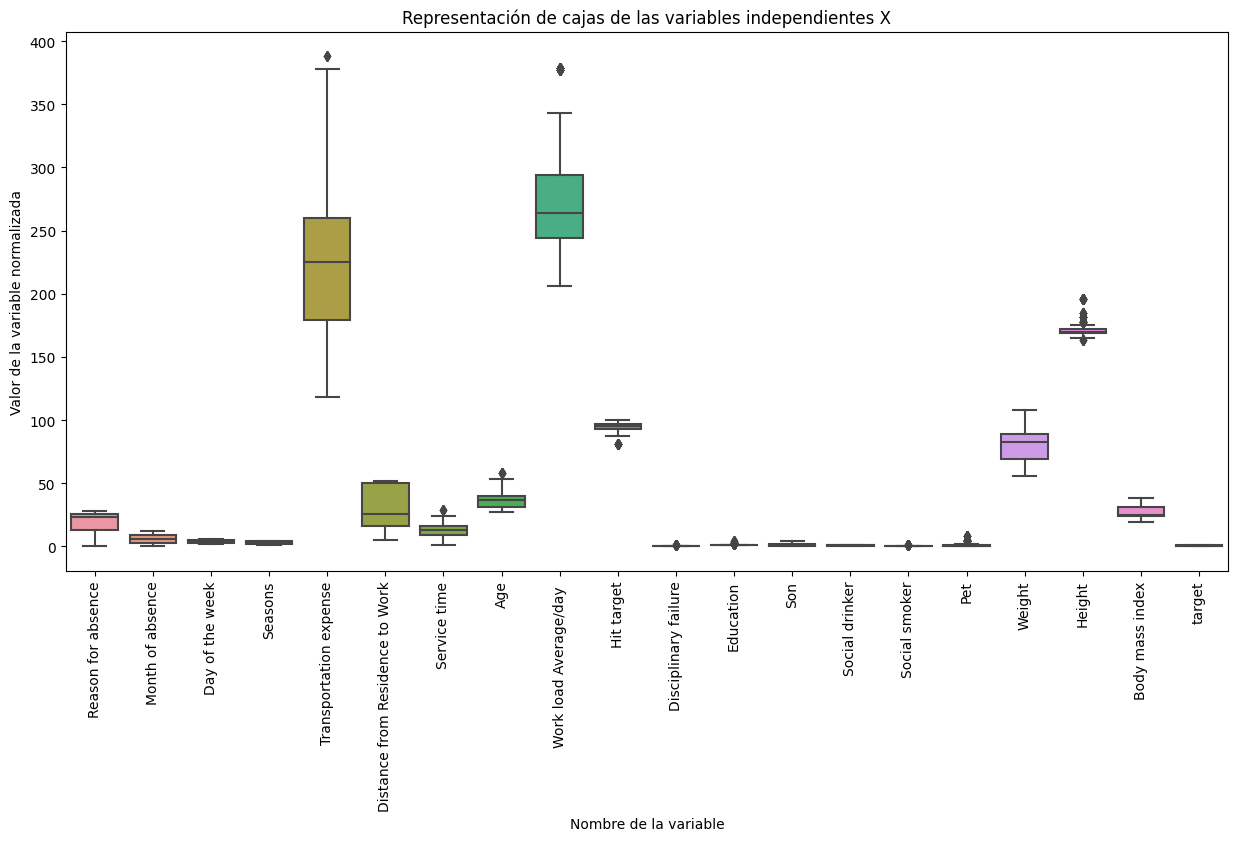

In [11]:
# Representa los boxplot
# Normaliza para tener rangos comparables en las features. No se normaliza la target
X_normalizado = df_raw
# X_normalizado = (X - X.mean()) / X.std()
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Representación de cajas de las variables independientes X")
plt.ylabel("Valor de la variable normalizada")
_ = plt.xlabel("Nombre de la variable")

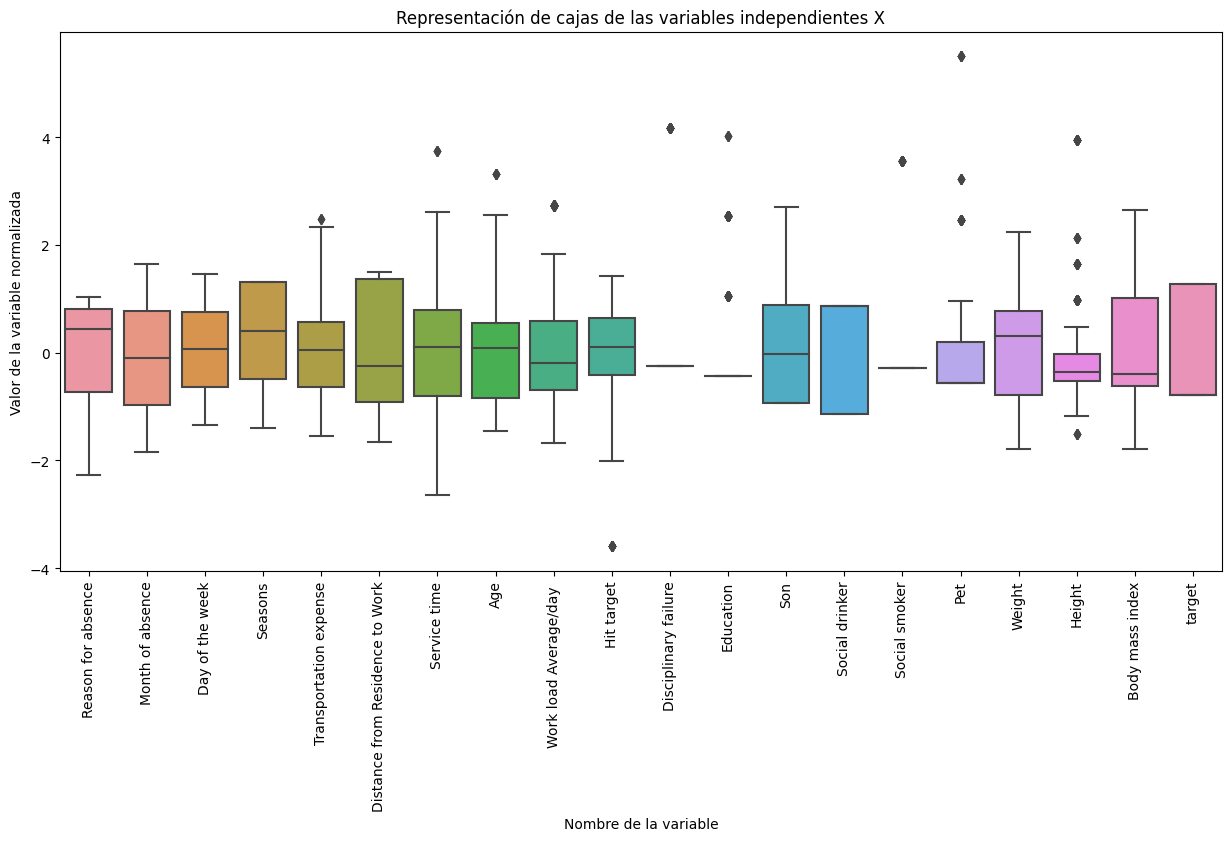

In [12]:
# Representa los boxplot
# Normaliza para tener rangos comparables en las features. No se normaliza la target
# X_normalizado = df_raw
X_normalizado = (df_raw - df_raw.mean()) / df_raw.std()
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=X_normalizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Representación de cajas de las variables independientes X")
plt.ylabel("Valor de la variable normalizada")
_ = plt.xlabel("Nombre de la variable")

In [13]:
X = df_raw.drop("target", axis=1)
Y = df_raw["target"]

In [14]:
obj_escalar = StandardScaler()
X_estandarizado = obj_escalar.fit_transform(X)

In [15]:
len(X_estandarizado[0])

19

In [16]:
X.pprint(2)

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,26,7,3,1,289,36,13,33,239.554,97,0,1,2,1,0,1,90,172,30
1,0,7,3,1,118,13,18,50,239.554,97,1,1,1,1,0,0,98,178,31


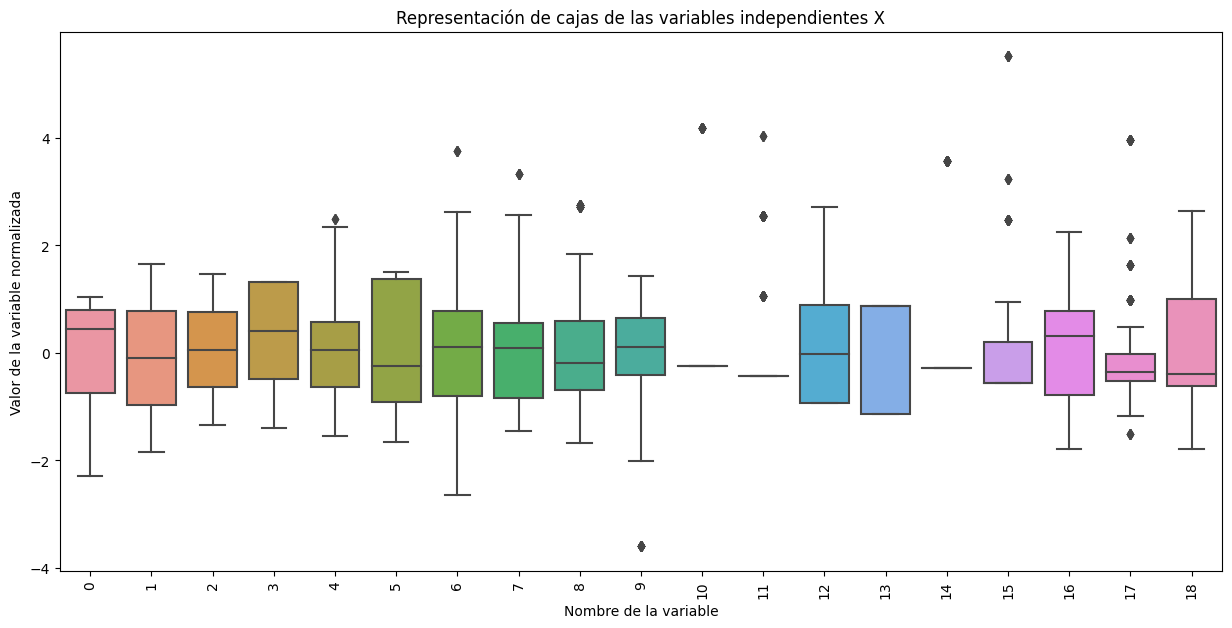

In [17]:
plt.figure(figsize=(15, 7))
ax = sns.boxplot(data=X_estandarizado)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title("Representación de cajas de las variables independientes X")
plt.ylabel("Valor de la variable normalizada")
_ = plt.xlabel("Nombre de la variable")

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_estandarizado, Y, test_size=0.2, random_state=0
)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [19]:
train = pd.DataFrame(X_train)
train["target"] = Y_train

test = pd.DataFrame(X_test)
test["target"] = Y_test

In [20]:
len(X_train)

592

In [21]:
len(X_test)

148

In [22]:
modelo = LogisticRegression()
modelo.fit(X_train, Y_train)

LogisticRegression()

In [23]:
modelo.score(X_test, Y_test)

0.7702702702702703

In [24]:
y_test_pred_prob = modelo.predict_proba(X_test)
metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1])

0.830438842203548

In [25]:
# Representa los histogramas de probabilidad de las predicciones en Test
y_test_pred_prob = modelo.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

In [26]:
import matplotlib.pyplot as plt


def represento_doble_hist(
    x_1, x_0, n_bins=11, title="", label_1="Clase 1", label_0="Clase 0", normed=0
):
    bins = n_bins
    plt.hist(x_1, bins, alpha=0.5, label=label_1, color="red")
    plt.hist(x_0, bins, alpha=0.5, label=label_0, color="green")
    plt.title(title)
    plt.legend(loc="best")

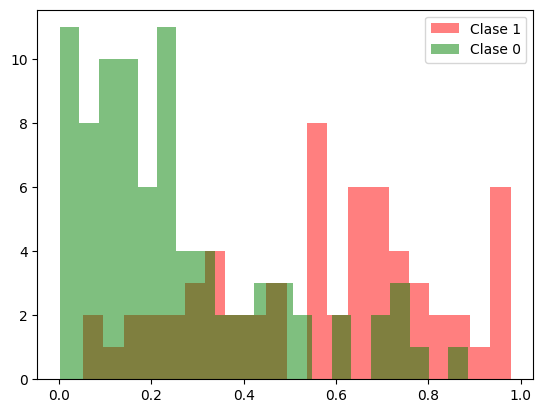

In [27]:
represento_doble_hist(
    y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, normed=0
)

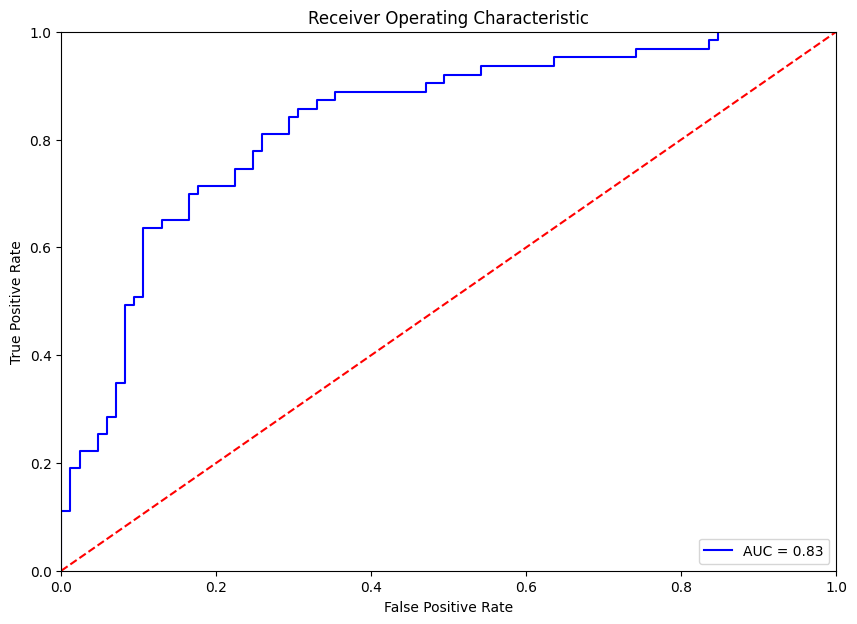

In [28]:
# Representa la curva ROC de las predicciones en Test
preds = y_test_pred_prob[:, 1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [29]:
from sklearn.dummy import DummyClassifier

In [30]:
dummy_model = DummyClassifier(strategy="most_frequent")
dummy_model.fit(X_train, Y_train)

DummyClassifier(strategy='most_frequent')

In [31]:
dummy_model.score(X_test, Y_test)

0.5743243243243243

In [32]:
y_test_pred_prob = dummy_model.predict_proba(X_test)
metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1])

0.5

In [33]:
# Representa los histogramas de probabilidad de las predicciones en Test
y_test_pred_prob = dummy_model.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]

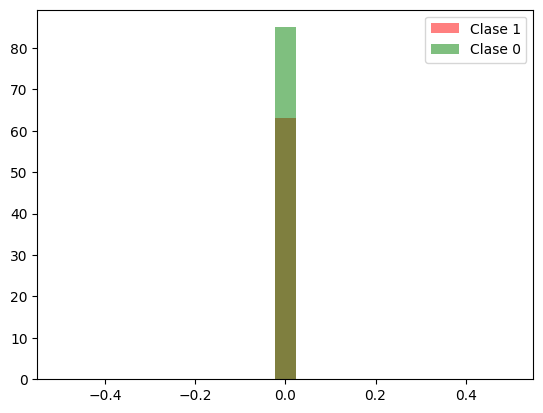

In [34]:
represento_doble_hist(
    y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, normed=0
)

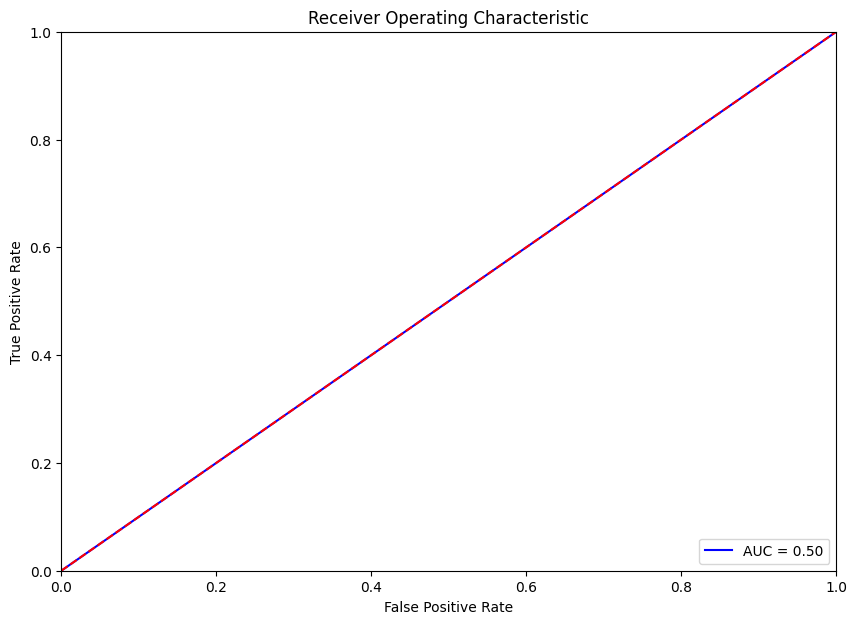

In [35]:
# Representa la curva ROC de las predicciones en Test
preds = y_test_pred_prob[:, 1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.title("Receiver Operating Characteristic")
plt.plot(fpr, tpr, "b", label="AUC = %0.2f" % roc_auc)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

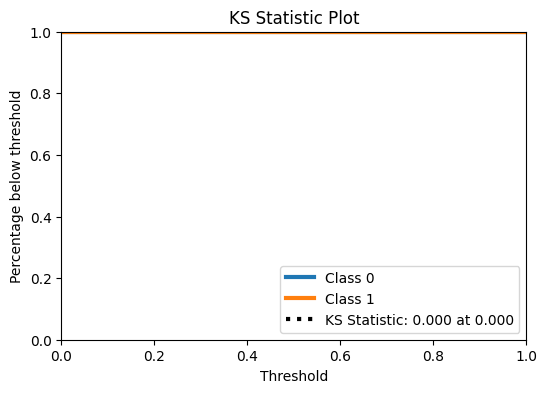

In [36]:
fig = skplt.metrics.plot_ks_statistic(Y_test, y_test_pred_prob, figsize=(6, 4))

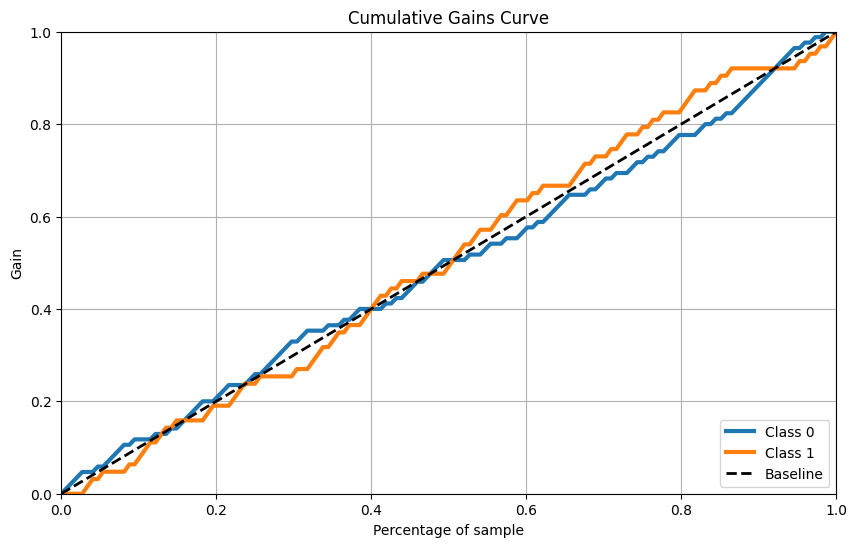

In [37]:
fig = skplt.metrics.plot_cumulative_gain(Y_test, y_test_pred_prob, figsize=(10, 6))

In [38]:
modelo = LogisticRegression()
modelo.fit(X_train, Y_train)
print(modelo.score(X_test, Y_test))
y_test_pred_prob = modelo.predict_proba(X_test)
metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1])

0.7702702702702703


0.830438842203548

In [39]:
parametros = {
    "C": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
    "class_weight": ["balanced", None],
}
modelo_gs = GridSearchCV(
    LogisticRegression(), param_grid=parametros, cv=5, scoring="roc_auc"
)
modelo_gs.fit(X_train, Y_train)
modelo_gs.score(X_test, Y_test)
y_test_pred_prob = modelo_gs.predict_proba(X_test)
metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1])

0.8317460317460317

In [40]:
modelo_gs.best_params_

{'C': 0.07, 'class_weight': 'balanced'}

In [41]:
y_test_pred_prob = modelo_gs.predict_proba(X_test)
metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1])

0.8317460317460317

In [42]:
metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])

0.7843198753206203

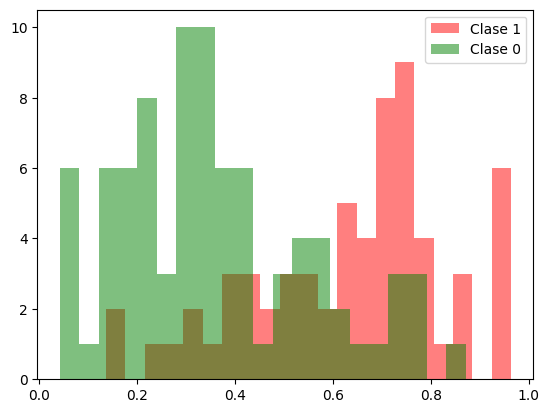

In [43]:
y_test_pred_prob = modelo_gs.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]
represento_doble_hist(
    y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, normed=0
)

ROC:  0.8317460317460317
precision_score:  0.7843198753206203


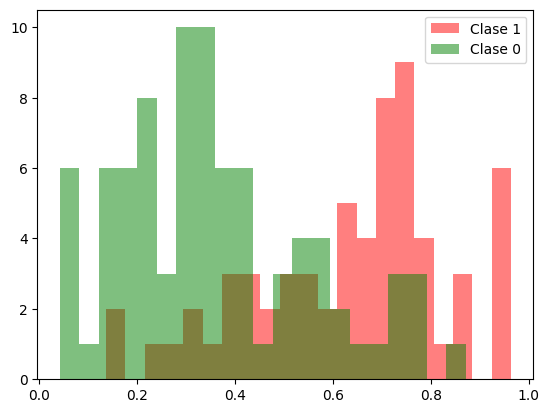

In [44]:
modelo = LogisticRegression(C=0.07, class_weight="balanced")
modelo.fit(X_train, Y_train)
y_test_pred_prob = modelo.predict_proba(X_test)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

y_test_pred_prob = modelo_gs.predict_proba(X_test)
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]
represento_doble_hist(
    y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, normed=0
)

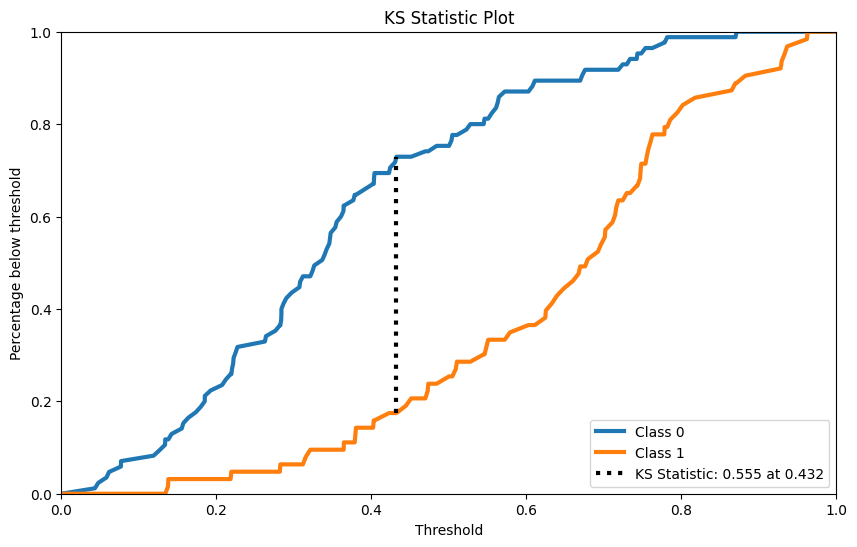

In [45]:
fig = skplt.metrics.plot_ks_statistic(Y_test, y_test_pred_prob, figsize=(10, 6))

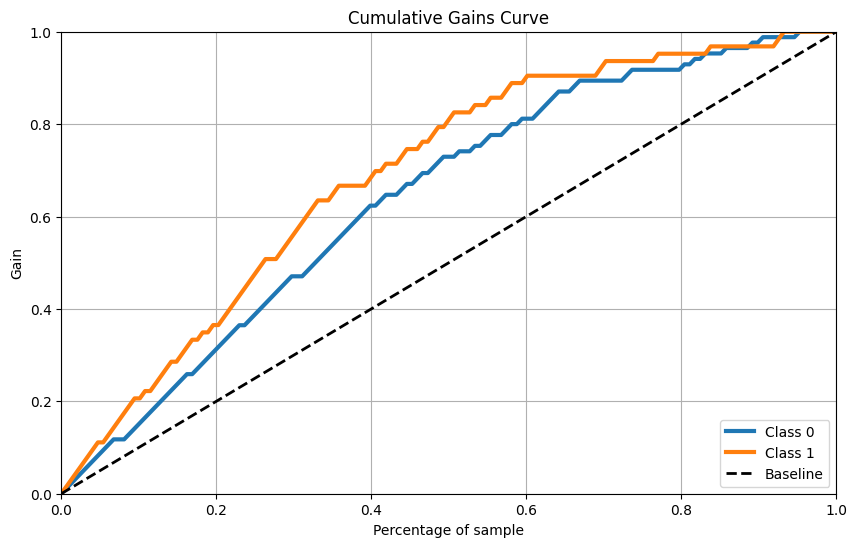

In [46]:
fig = skplt.metrics.plot_cumulative_gain(Y_test, y_test_pred_prob, figsize=(10, 6))

In [47]:
FutureWarning

FutureWarning

In [48]:
from sklearn.pipeline import Pipeline
from utils import DataTypes, DropPerfectCorrCols, Dummyfy, Simple_Imputer

In [49]:
p1 = ("DataTypes", DataTypes("target"))
p2 = ("simple_imputer", Simple_Imputer())
p3 = ("dummyfy", Dummyfy())
p4 = ("DropPerfectCorrCols", DropPerfectCorrCols())

In [50]:
pl = Pipeline([p1, p2, p3, p4])

In [51]:
train_df = pl.fit_transform(train)
train_df.head()

float64 -> float32  0
float64 -> float32  1
float64 -> float32  2
float64 -> float32  3
float64 -> float32  4
float64 -> float32  5
float64 -> float32  6
float64 -> float32  7
float64 -> float32  8
float64 -> float32  9
float64 -> float32  10
float64 -> float32  11
float64 -> float32  12
float64 -> float32  13
float64 -> float32  14
float64 -> float32  15
float64 -> float32  16
float64 -> float32  17
float64 -> float32  18
float32 -> object (nunique = 2) 10
float32 -> object (nunique = 2) 13
float32 -> object (nunique = 2) 14


,0,1,2,3,4,5,6,7,8,9,11,12,15,16,17,18,10_4.183300018310547,13_0.8728715777397156,14_3.564225435256958
0,0.805,1.070,1.468,1.310,0.369,-0.312,0.786,0.703,0.342,-0.950,-0.434,-0.928,-0.566,-0.935,-0.351,-0.859,0.000,1.000,0.000
1,-0.026,-0.968,0.060,-0.490,0.369,-0.312,0.786,0.703,-0.694,0.903,-0.434,-0.928,-0.566,-0.935,-0.351,-0.859,0.000,1.000,0.000
2,0.449,0.779,-1.348,-1.390,-0.633,-0.245,-0.811,-0.996,-0.249,-2.009,2.539,-0.928,-0.566,-1.789,-0.185,-1.793,0.000,0.000,0.000
3,0.805,0.197,0.060,-1.390,1.011,0.430,0.102,-0.533,0.098,0.903,-0.434,0.894,0.193,0.852,-0.019,0.776,0.000,1.000,0.000
4,-1.094,-1.550,0.764,-0.490,1.011,1.239,3.753,1.938,1.077,0.374,-0.434,-0.928,0.952,2.250,-0.019,2.177,0.000,0.000,0.000


In [52]:
test_df = pl.fit_transform(test)
test_df.head()

float64 -> float32  0
float64 -> float32  1
float64 -> float32  2
float64 -> float32  3
float64 -> float32  4
float64 -> float32  5
float64 -> float32  6
float64 -> float32  7
float64 -> float32  8
float64 -> float32  9
float64 -> float32  10
float64 -> float32  11
float64 -> float32  12
float64 -> float32  13
float64 -> float32  14
float64 -> float32  15
float64 -> float32  16
float64 -> float32  17
float64 -> float32  18
float32 -> object (nunique = 2) 10
float32 -> object (nunique = 2) 13
float32 -> object (nunique = 2) 14


,0,1,2,3,4,5,6,7,8,9,11,12,15,16,17,18,10_4.183300018310547,13_0.8728715777397156,14_3.564225435256958
0,1.042,-0.677,1.468,0.410,0.399,-0.312,0.330,1.629,1.408,0.374,-0.434,0.894,0.193,0.541,-1.180,1.243,0.000,0.000,0.000
1,-0.738,-0.677,0.060,0.410,0.369,-0.312,0.786,0.703,1.408,0.374,-0.434,-0.928,-0.566,-0.935,-0.351,-0.859,0.000,1.000,0.000
2,0.449,0.197,0.060,-1.390,-0.633,1.441,1.243,0.239,-0.818,0.639,-0.434,-0.928,-0.566,0.774,-0.351,1.009,0.000,1.000,0.000
3,-0.144,0.488,0.764,-1.390,0.204,-0.043,-0.126,1.784,-1.680,-0.685,-0.434,-0.017,3.229,0.696,-1.511,1.476,0.000,0.000,1.000
4,-0.026,-0.386,1.468,0.410,1.176,-0.245,0.102,1.012,-0.867,1.168,-0.434,0.894,0.193,-0.158,0.478,-0.392,0.000,1.000,1.000


In [53]:
parametros = {
    "C": [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
    "class_weight": ["balanced", None],
}
modelo_gs = GridSearchCV(
    LogisticRegression(), param_grid=parametros, cv=5, scoring="roc_auc"
)
modelo_gs.fit(train_df, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09],
                         'class_weight': ['balanced', None]},
             scoring='roc_auc')

In [54]:
y_test_pred_prob = modelo_gs.predict_proba(test_df)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

ROC:  0.7604108309990663
precision_score:  0.7132516841714714


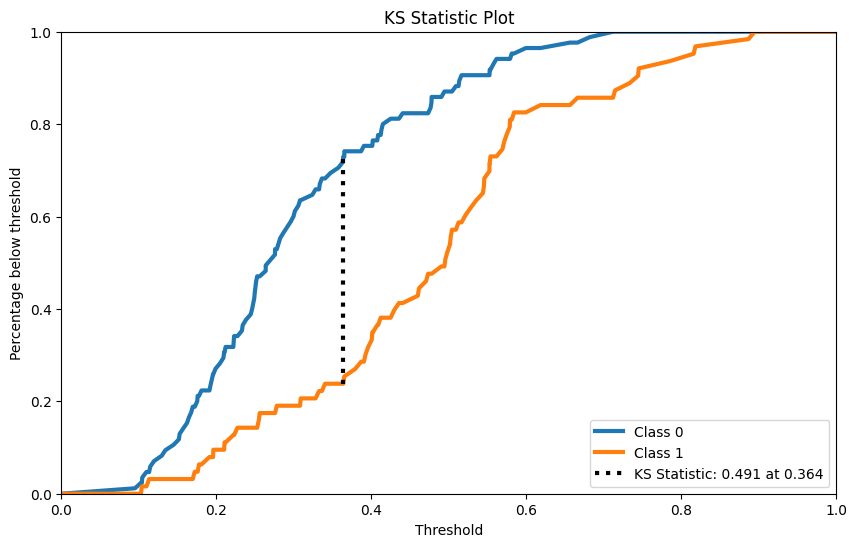

In [55]:
fig = skplt.metrics.plot_ks_statistic(Y_test, y_test_pred_prob, figsize=(10, 6))

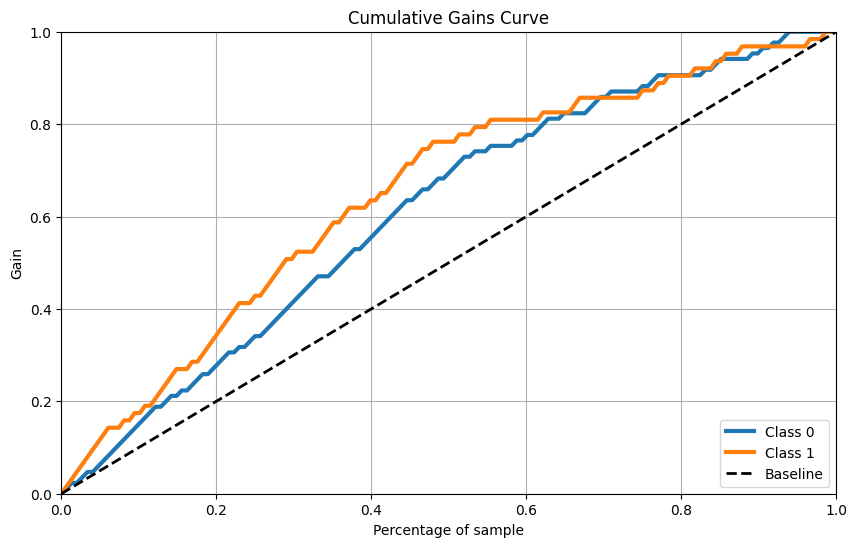

In [56]:
fig = skplt.metrics.plot_cumulative_gain(Y_test, y_test_pred_prob, figsize=(10, 6))

In [57]:
modelo = LogisticRegression(C=0.07, class_weight="balanced")
modelo.fit(train_df, Y_train)
y_test_pred_prob = modelo.predict_proba(test_df)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

ROC:  0.7626517273576097
precision_score:  0.7109744717741158


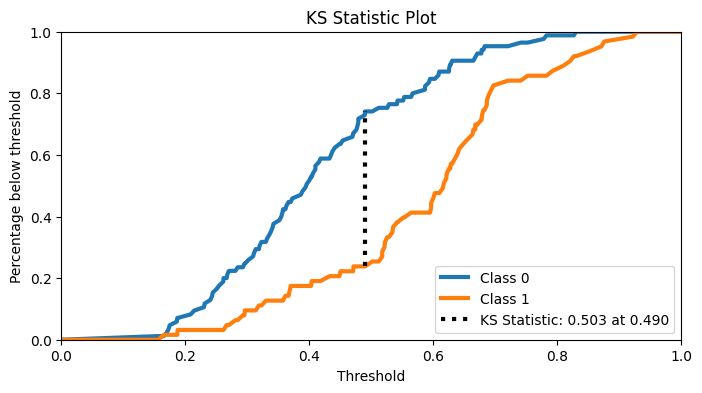

In [58]:
fig = skplt.metrics.plot_ks_statistic(Y_test, y_test_pred_prob, figsize=(8, 4))

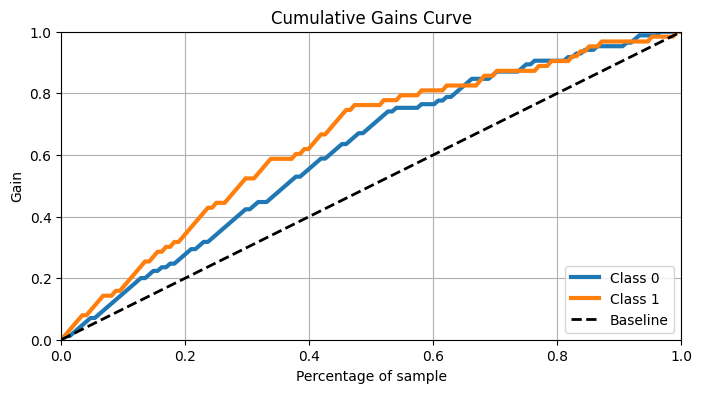

In [59]:
fig = skplt.metrics.plot_cumulative_gain(Y_test, y_test_pred_prob, figsize=(8, 4))

In [60]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [61]:
import lightgbm as lgb

In [62]:
model_lgb = lgb.LGBMClassifier()
model_lgb.fit(train_df, Y_train)
y_test_pred_prob = model_lgb.predict_proba(test_df)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

ROC:  0.89187675070028
precision_score:  0.8399526135368884


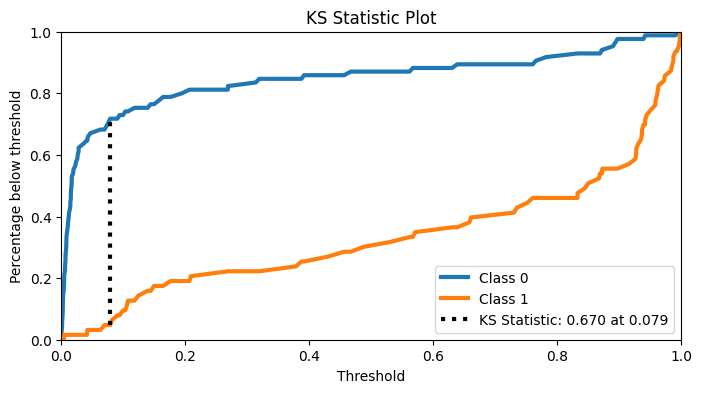

In [63]:
fig = skplt.metrics.plot_ks_statistic(Y_test, y_test_pred_prob, figsize=(8, 4))

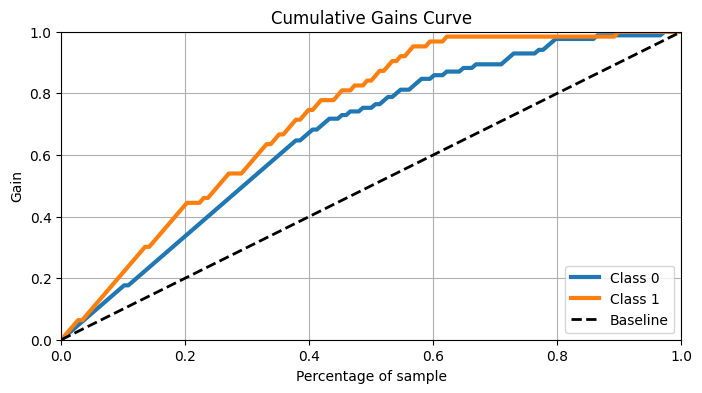

In [64]:
fig = skplt.metrics.plot_cumulative_gain(Y_test, y_test_pred_prob, figsize=(8, 4))

In [110]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 17.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 22.3 MB/s eta 0:00:0000:0100:01
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
Note: you may need to restart the kernel to use updated packages.


In [111]:
from catboost import CatBoostClassifier

In [112]:
np.random.seed(123)
model_cat = CatBoostClassifier(random_state=123, silent=True)
model_cat.fit(train_df, Y_train)
y_test_pred_prob = model_cat.predict_proba(test_df)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

ROC:  0.8980392156862745
precision_score:  0.8614324494689094


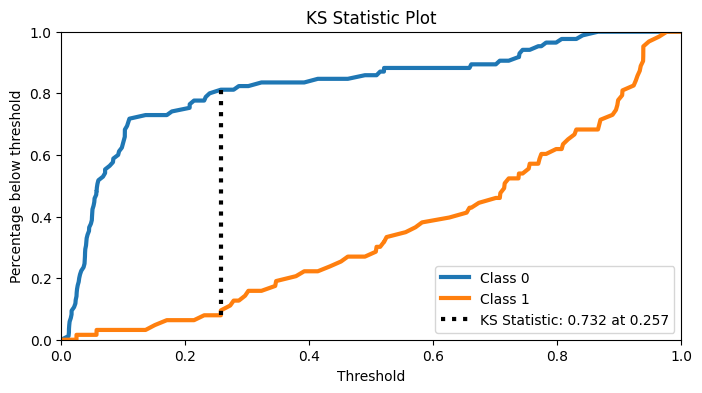

In [113]:
fig = skplt.metrics.plot_ks_statistic(Y_test, y_test_pred_prob, figsize=(8, 4))

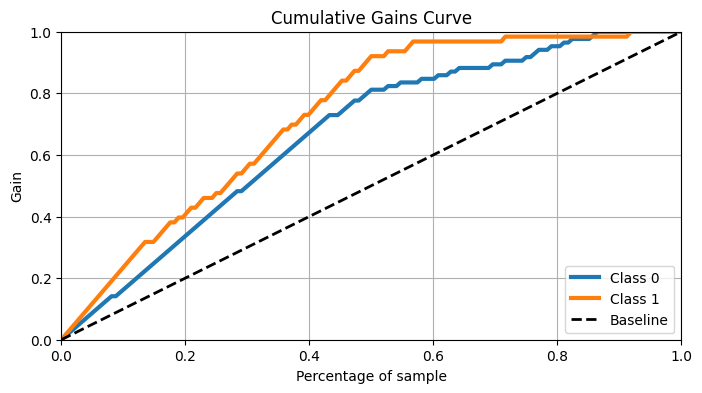

In [114]:
fig = skplt.metrics.plot_cumulative_gain(Y_test, y_test_pred_prob, figsize=(8, 4))

In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [119]:
model_ada = AdaBoostClassifier()
model_ada.fit(train_df, Y_train)
y_test_pred_prob = model_ada.predict_proba(test_df)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

ROC:  0.8969187675070028
precision_score:  0.8522500768805589


In [131]:
model_ada = AdaBoostClassifier(
    learning_rate=0.76,
)
model_ada.fit(train_df, Y_train)
y_test_pred_prob = model_ada.predict_proba(test_df)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

ROC:  0.9079365079365079
precision_score:  0.8729265650243703


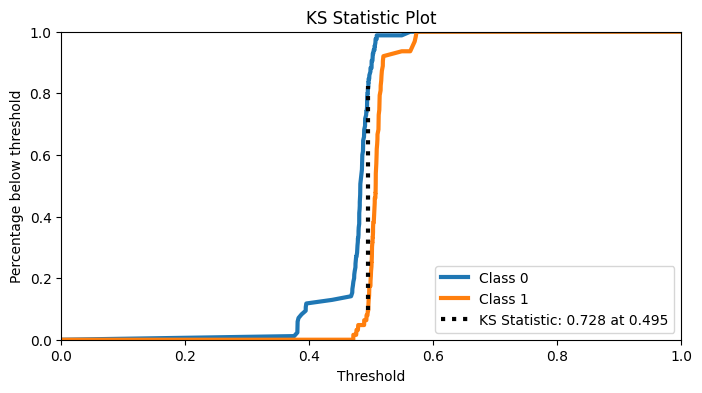

In [132]:
fig = skplt.metrics.plot_ks_statistic(Y_test, y_test_pred_prob, figsize=(8, 4))

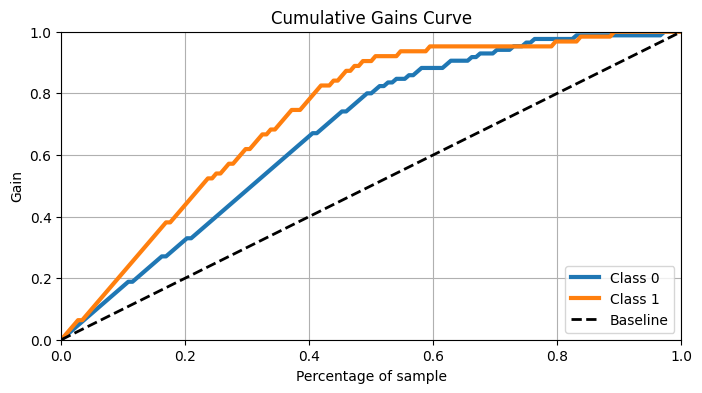

In [133]:
fig = skplt.metrics.plot_cumulative_gain(Y_test, y_test_pred_prob, figsize=(8, 4))

In [134]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 11.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [135]:
from xgboost import XGBClassifier

In [136]:
model_xgb = XGBClassifier()
model_xgb.fit(train_df, Y_train)
y_test_pred_prob = model_xgb.predict_proba(test_df)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

ROC:  0.8842203548085901
precision_score:  0.8345526156593164


In [65]:
from xgboost import XGBRFClassifier

In [66]:
model_xgb = XGBRFClassifier()
model_xgb.fit(train_df, Y_train)
y_test_pred_prob = model_xgb.predict_proba(test_df)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

ROC:  0.9172735760971055
precision_score:  0.8743893324140606


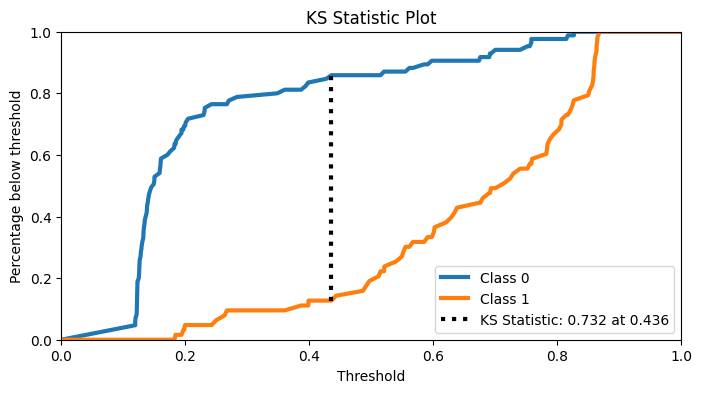

In [67]:
fig = skplt.metrics.plot_ks_statistic(Y_test, y_test_pred_prob, figsize=(8, 4))

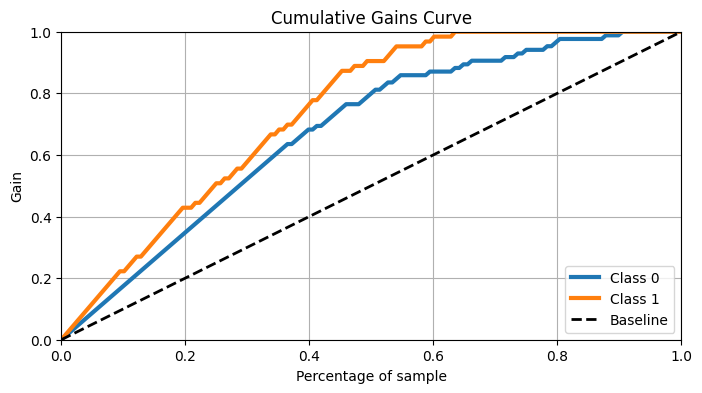

In [68]:
fig = skplt.metrics.plot_cumulative_gain(Y_test, y_test_pred_prob, figsize=(8, 4))

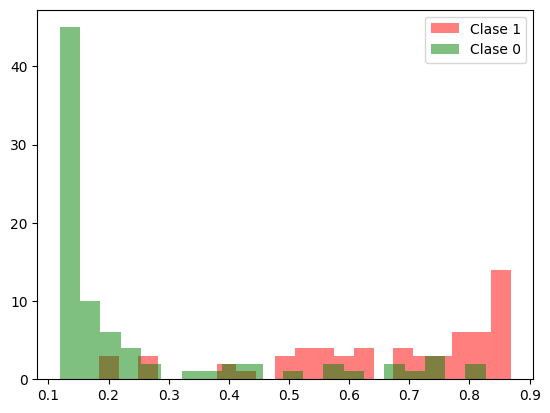

In [69]:
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]
represento_doble_hist(
    y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, normed=0
)

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

In [72]:
model_gbc = GradientBoostingClassifier()
model_gbc.fit(train_df, Y_train)
y_test_pred_prob = model_gbc.predict_proba(test_df)
print("ROC: ", metrics.roc_auc_score(Y_test, y_test_pred_prob[:, 1]))
print(
    "precision_score: ", metrics.average_precision_score(Y_test, y_test_pred_prob[:, 1])
)

ROC:  0.9077497665732959
precision_score:  0.8691528261348209


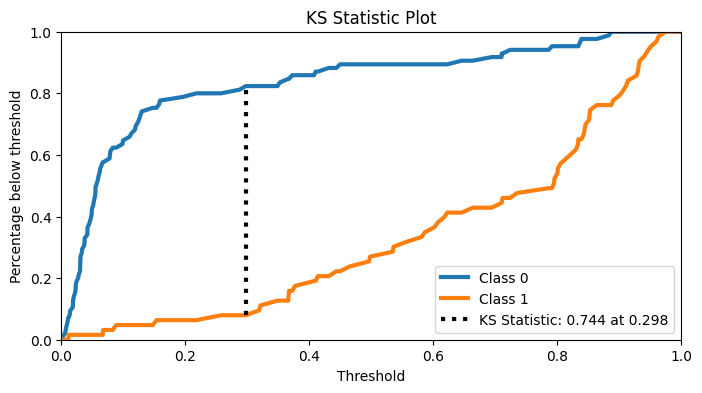

In [73]:
fig = skplt.metrics.plot_ks_statistic(Y_test, y_test_pred_prob, figsize=(8, 4))

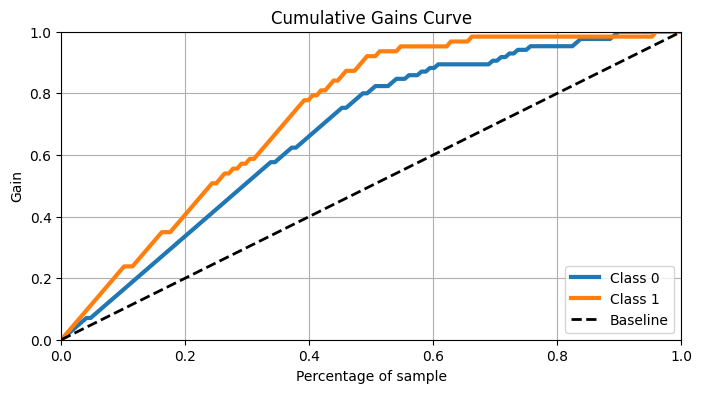

In [74]:
fig = skplt.metrics.plot_cumulative_gain(Y_test, y_test_pred_prob, figsize=(8, 4))

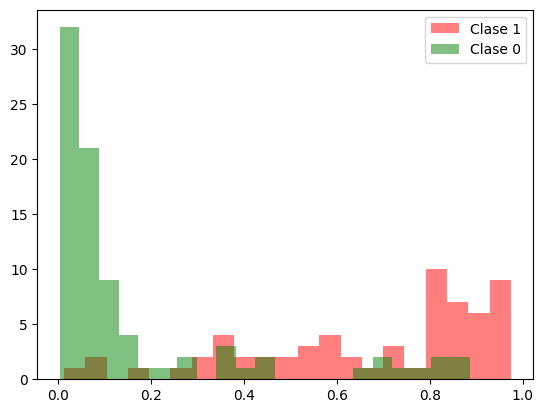

In [75]:
y_test_pred_prob_pos = y_test_pred_prob[np.where(Y_test == 1)[0]]
y_test_pred_prob_neg = y_test_pred_prob[np.where(Y_test == 0)[0]]
represento_doble_hist(
    y_test_pred_prob_pos[:, 1], y_test_pred_prob_neg[:, 1], n_bins=21, normed=0
)